<a href="https://colab.research.google.com/github/David-Gentil/Regressao-Linear_DNC/blob/main/Regress%C3%A3o_Linear_M%C3%BAltipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução
A regressão linear múltipla é uma técnica estatística que permite explorar a relação entre uma variável resposta (variável dependente Y) e duas ou mais variáveis explanatórias (variáveis independentes X1, X2 etc). O objetivo é desenvolver um modelo que possa prever os valores da variável resposta com base nos valores das variáveis independentes.

#Contextualização do Problema

O problema apresentado é: a escola DNC solicitou que, com base nos dados de investimento, investimento em marketing e gastos administrativos, seja possível prever o lucro da escola.

Portanto, temos:


Variável resposta: lucro da escola
Variáveis explanatórias:

Investimento
Investimento em marketing
Gastos administrativos

A tarefa é realizar uma análise desses dados e desenvolver um modelo de regressão linear múltipla que permita prever o lucro da escola com base nas demais variáveis.

#1. Análise Exploratória dos Dados

A primeira etapa em qualquer projeto de modelagem preditiva é entender os dados que estão disponíveis. Isso envolve tarefas como:

*   Verificar a quantidade de observações e variáveis
*   Analisar e tratar valores missing
*   Verificar a presença de outliers
*   Explorar a distribuição das variáveis (normalidade, dispersão etc)
*   Verificar a presença de multicolinearidade entre as variáveis independentes
*   Plotar gráficos de dispersão e calcular correlações

##Verificação inicial dos dados

In [34]:
#Importando Bibliotecas para o modelo
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error

In [6]:
#Importando e lendo Dataset
Lucro = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Regressão Linear_Exercício/Cópia de Exercicio_Lucro.xlsx')
Lucro.head()

,Investimento,Investimento_Mkt,Gastos_Administrativos,Lucro
0,0,45173,116984,14681
1,542,0,51743,35673
2,0,0,135427,42560
3,1315,297114,115816,49491
4,1000,1904,124153,64926


In [7]:
#Verificando Dados do Dataset
Lucro.describe()

,Investimento,Investimento_Mkt,Gastos_Administrativos,Lucro
count,50.000000,50.000000,50.000000,50.000000
mean,67424.640000,209025.100000,121344.660000,112012.660000
std,41185.032081,124478.753157,28017.823235,40306.215134
min,0.000000,0.000000,51283.000000,14681.000000
25%,38452.500000,122123.500000,103730.500000,90138.750000
50%,70967.500000,212716.500000,122700.000000,107978.000000
75%,94663.000000,299468.750000,144842.500000,139766.250000
max,144372.000000,471784.000000,182646.000000,192262.000000


In [9]:
#Verificando Informações do Dataset
Lucro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Investimento            50 non-null     int64
 1   Investimento_Mkt        50 non-null     int64
 2   Gastos_Administrativos  50 non-null     int64
 3   Lucro                   50 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


###Verificamos que:

*   Não temos dados faltantes;
*   Temos 50 linhas;
*   Temos 4 colunas do tipo inteiro.

##Explorar a distribuição das variáveis

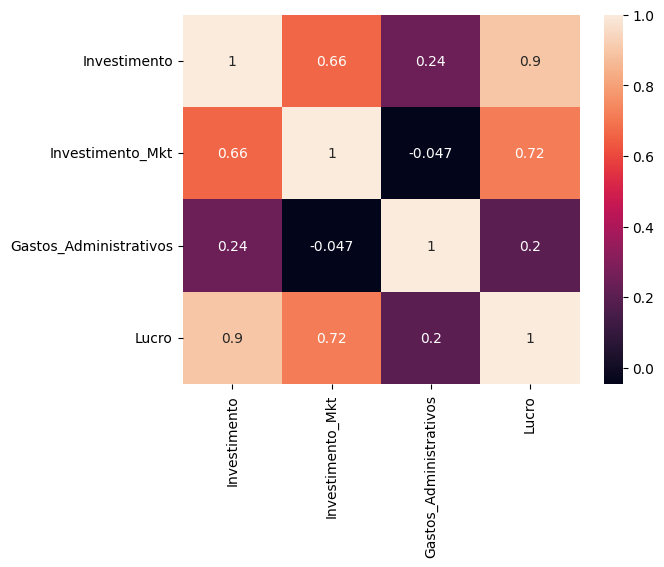

In [18]:
#Plotando Heatmap para verificar as correlações númericas
sns.heatmap(Lucro.corr(), annot=True);

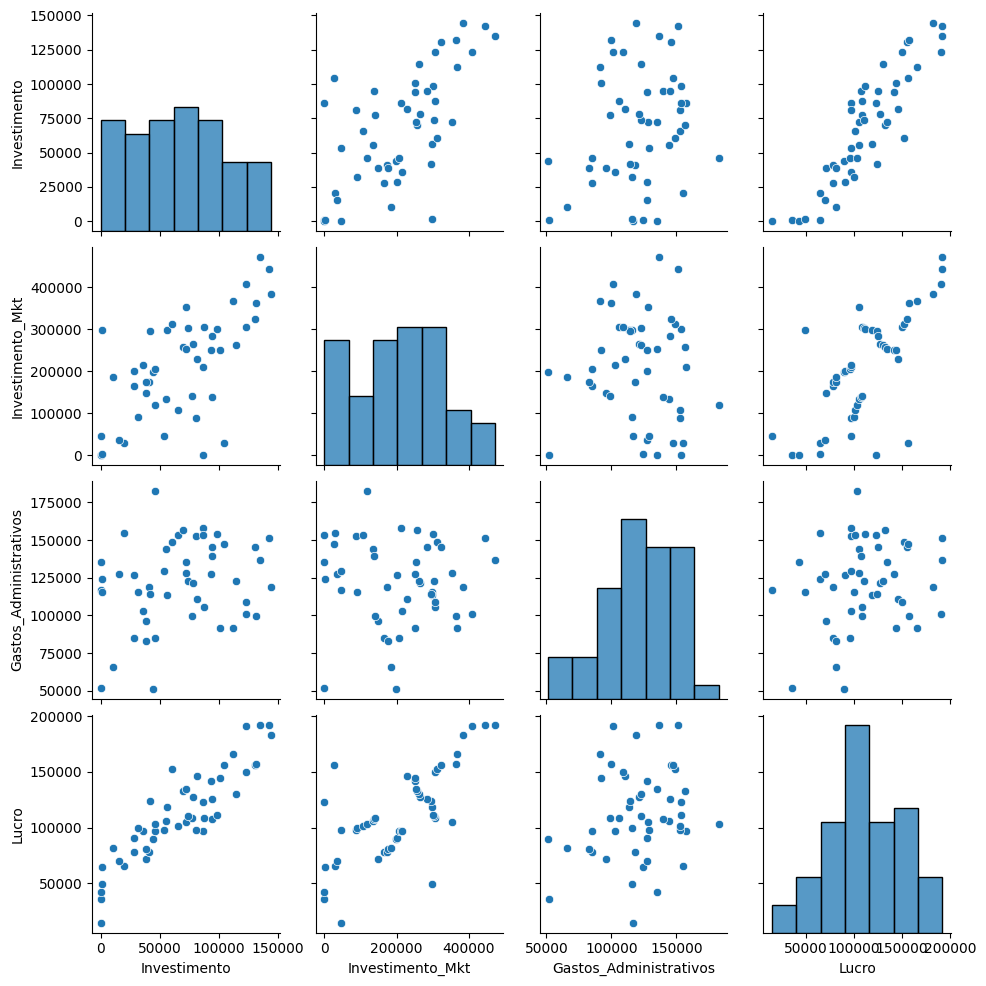

In [16]:
#Plotando Pairplot para verificar a correlação gráfica dos dados
sns.pairplot(Lucro);

###Verificamos que:

A variável Lucro sofre maiores influências das variáveis Investimento (0.9) e Investimento_Mkt (0.72)

#2. Seleção de Variáveis

Com base na análise exploratória, a próxima etapa é decidir quais variáveis independentes devem ser incluídas no modelo de regressão linear múltipla. Há vários métodos que podem ser utilizados:



*   Backward: começa com todas as variáveis no modelo e vai removendo aquelas não significativas;
*   Forward: começa sem variáveis no modelo e vai adicionando aquelas que são significativas;
*   Stepwise: mescla os métodos backward e forward, removendo e adicionando variáveis a cada passo.

O objetivo é adicionar ao modelo apenas aquelas variáveis que tenham um p-value menor do que 5%, indicando que são estatisticamente significativas para explicar a variabilidade da resposta.

In [22]:
#modelo MRLS
mrls = 'Lucro~Investimento+Investimento_Mkt+Gastos_Administrativos'
model = smf.ols(formula=mrls, data=Lucro).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Lucro   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     75.97
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           7.60e-18
Time:                        20:29:41   Log-Likelihood:                -556.05
No. Observations:                  50   AIC:                             1120.
Df Residuals:                      46   BIC:                             1128.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4.21

###Notamos que a variável Gastos_Administrativos possui o p-value > que 5%, confirmando os dados de correlação, portanto iremos excluir essa variável do modelo

In [23]:
#modelo MRLS sem a coluna "Gastos_Administrativos"
mrls = 'Lucro~Investimento+Investimento_Mkt'
model = smf.ols(formula=mrls, data=Lucro).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Lucro   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     115.7
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           7.01e-19
Time:                        20:32:14   Log-Likelihood:                -556.18
No. Observations:                  50   AIC:                             1118.
Df Residuals:                      47   BIC:                             1124.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.758e+04   5004.534  

###Notamos que o p-value das nossas variáveis está no target proposto, portanto podemos seguir com o processo.
###Temos nosso R² corrigido de 82.4%

#3. Desenvolvimento do Modelo

Após definir quais variáveis independentes serão utilizadas, o próximo passo é ajustar o modelo de regressão linear múltipla propriamente dito utilizando o método dos mínimos quadrados ordinários.

Isso envolve estimar os coeficientes de regressão para cada variável independente incluída no modelo. O modelo final terá um coeficiente linear para cada X e um intercepto que representa o valor de Y quando todas as variáveis independentes são iguais a zero.

In [27]:
#Treinando o modelo
modelo = smf.ols(formula=mrls, data=Lucro).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Lucro   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     115.7
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           7.01e-19
Time:                        20:40:52   Log-Likelihood:                -556.18
No. Observations:                  50   AIC:                             1118.
Df Residuals:                      47   BIC:                             1124.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.758e+04   5004.534  

#4. Avaliação e Validação

Por fim, o modelo desenvolvido precisa passar por etapas de avaliação e validação, que envolvem:



*   Análise dos resíduos para verificar pressupostos da regressão
*   Cálculo de métricas de desempenho como R2, R2 ajustado e erro quadrático médio
*   Validação cruzada ou em conjunto de teste para avaliar capacidade preditiva

In [32]:
#Prevendo o Lucro do próximo período
Lucro['Lucro_Previsto'] = modelo.predict().astype(int)
Lucro.head()

,Investimento,Investimento_Mkt,Gastos_Administrativos,Lucro,Lucro_Previsto
0,0,45173,116984,14681,50784
1,542,0,51743,35673,47978
2,0,0,135427,42560,47579
3,1315,297114,115816,49491,69623
4,1000,1904,124153,64926,48450


In [33]:
#Calculando o resíduo
Lucro['Resíduo'] = Lucro['Lucro'] - Lucro['Lucro_Previsto']
Lucro.head()

,Investimento,Investimento_Mkt,Gastos_Administrativos,Lucro,Lucro_Previsto,Resíduo
0,0,45173,116984,14681,50784,-36103
1,542,0,51743,35673,47978,-12305
2,0,0,135427,42560,47579,-5019
3,1315,297114,115816,49491,69623,-20132
4,1000,1904,124153,64926,48450,16476


In [46]:
# Calcular o R²
r2 = r2_score(Lucro['Lucro'], Lucro['Lucro_Previsto'])
print(f'R²: {r2:.3f}')

R²: 0.831


In [45]:
# Calcular o R² ajustado
n = len(Lucro['Lucro_Previsto'])
p = 1
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R² Ajustado: {r2_ajustado:.3f}')

R² Ajustado: 0.828


In [47]:
# Calcular o Erro Quadrático Médio
mse = mean_squared_error(Lucro['Lucro'], Lucro['Lucro_Previsto'])

print(f"R²: {r2:.3f}")
print(f"R² ajustado: {r2_ajustado:.3f}")
print(f"Erro Quadrático Médio: {mse:.2f}")

R²: 0.831
R² ajustado: 0.828
Erro Quadrático Médio: 268811886.24
